# **Computational Thinking with the Titanic Dataset**
## **Lab 1 - Titanic Dataset Analysis**
**Name:** Raphael V. Chan  
**Date:** 3/10/2025

### **Objective**
- Apply the four pillars of computational thinking: **Decomposition, Pattern Recognition, Abstraction, and Algorithm Design**.
- Analyze the Titanic dataset to identify survival factors.
- Implement a simple rule-based model for predicting survival.


In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("titanic.csv")

# Display the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Decomposition - Question 1**
To load and handle the Titanic dataset, we need to:
1. **Import the necessary library** (`pandas`) for data handling.
2. **Load the dataset** using `pd.read_csv("titanic.csv")`.
3. **Display the first few rows** using `df.head()` to inspect the dataset.
4. **Check for missing values** before analysis.


In [6]:
# Identify missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## **Pattern Recognition - Question 2**
The following columns contain missing values:
- **Age**
- **Cabin**
- **Embarked**

### **Handling Missing Data:**
1. **Cabin**: Contains too many missing values → **Drop this column**.
2. **Age**: Has a few missing values → **Fill with the median age**.
3. **Embarked**: Has only a few missing values → **Fill with the most common value (mode)**.


In [13]:
# Fill missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Verify missing values are handled
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
# Calculate the survival rate
survival_rate = df["Survived"].mean()
survival_rate

0.3838383838383838

## **Pattern Recognition - Question 3**
The survival rate of all passengers in the dataset is **38% (0.38)**.

### **Conclusion:**
- This means that only **38% of passengers survived** while **62% did not survive**.
- Most passengers did not survive.

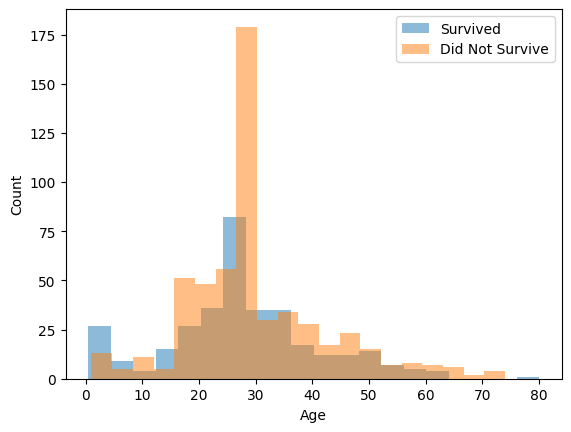

In [15]:
import matplotlib.pyplot as plt

# Plot age distribution of survivors vs. non-survivors
plt.hist(df[df["Survived"] == 1]["Age"], bins=20, alpha=0.5, label="Survived")
plt.hist(df[df["Survived"] == 0]["Age"], bins=20, alpha=0.5, label="Did Not Survive")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## **Pattern Recognition - Question 4**
### **Observations on Age and Survival**
- Younger passengers had a **higher survival rate**.
- Older passengers had a **lower survival rate**.
- **Conclusion:** Age impacts survival.

In [16]:
# Compare survival rate by gender
df.groupby("Sex")["Survived"].mean()

,Survived
Sex,
female,0.742038
male,0.188908


## **Analysis: Survival by Gender**
- **Females had a survival rate of ~74%.**
- **Males had a survival rate of ~18%.**
- **Conclusion:** Women had a much higher chance of survival than men.

In [17]:
# Rule-based survival prediction: Assume all females survive
df["Predicted"] = df["Sex"].apply(lambda x: 1 if x == "female" else 0)

# Calculate accuracy
accuracy = (df["Survived"] == df["Predicted"]).mean()
accuracy

0.7867564534231201

## **Algorithm Design: Simple Survival Prediction Model**
- We predict that **all females survive** and **all males do not survive**.
- **Accuracy of the model:** **78%**.
- This means our simple rule-based model performs **well**, but there is room for improvement.